In [12]:
import matplotlib.pyplot as plt
import MDAnalysis as mda
import numpy as np
import os
from scipy.spatial.distance import cdist
import random
import pandas as pd
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Global variables

In [13]:
wdir="/martini/rubiz/Github/PsbS_Binding_Site"
dir3=f"{wdir}/3_reference_proteins"
dir4=f"{wdir}/4_pairs"
dir5=f"{wdir}/5_psii"

#---IMPORTANT FILES IN THIS SCRIPT
pdb0=f"{dir5}/base_dir/rotated.pdb" # CG PSII with cofactors and chains 


In [14]:
u0 = mda.Universe(pdb0) 
pos0 = u0.select_atoms("all").positions

# Load trajectories

In [15]:
# Load on-the-fly daft files
chains=["4", "s", "r", "c", "8", "S", "R", "C"]
rotations=20
seeds=(242, 484)

dict_daft = {}
for chain in chains:
    for rot in range(1, rotations + 1):
        for seed in seeds:
            rotation=f"{rot:04d}"
            dir=f"{dir5}/daft_initial/chain_{chain}"
            file=f"{dir}/chain_{chain}_seed{seed}_{rotation}.pdb"
            if os.path.exists(file):
                u = mda.Universe(file)
                dict_daft[f"chain_{chain}_seed{seed}_{rotation}"] = u
            else:
                print(f"File {file} does not exist!")
                break


# Segment the structures into groups

In [16]:
# add coordinates to the daft files
for key, u in dict_daft.items():
    coordinates = u.select_atoms("not chainID A B").positions
    dict_daft[key].positions_chain = coordinates
    coordinates = u.select_atoms("chainID A B").positions
    dict_daft[key].positions_psbs = coordinates
    center_of_mass = u.select_atoms("not chainID A B").center_of_mass()
    dict_daft[key].center_of_mass_chain = center_of_mass
    center_of_mass = u.select_atoms("chainID A B").center_of_mass()
    dict_daft[key].center_of_mass_psbs = center_of_mass

# Figure to illustrate DAFT simulations

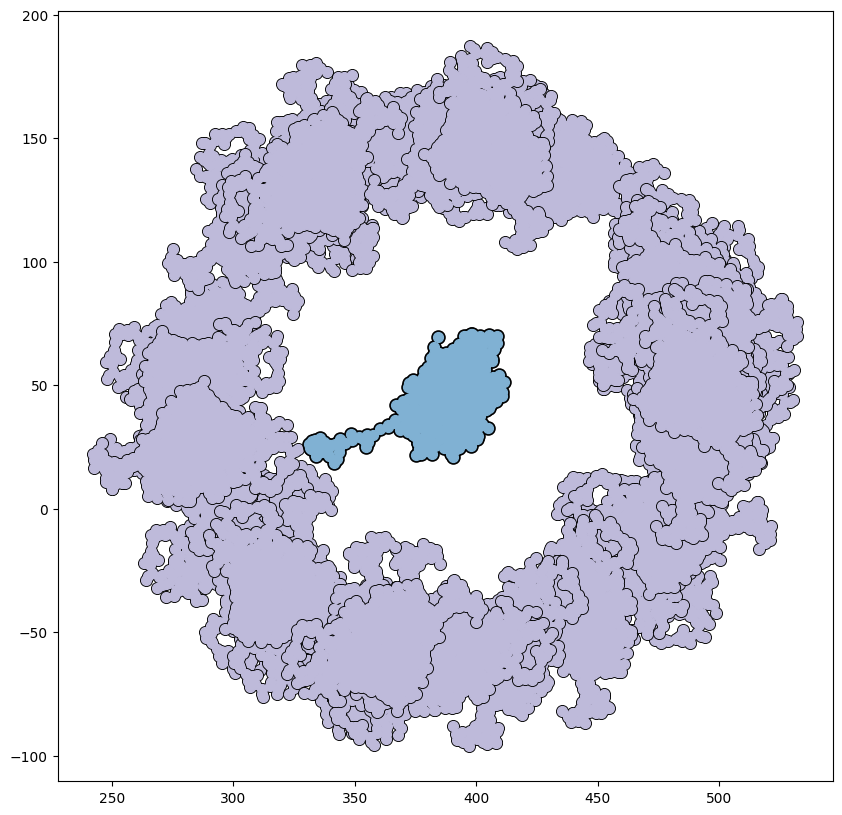

In [17]:


#Plot the coordinates
fig, ax = plt.subplots(figsize=(10, 10))
#ax.scatter(u0.atoms.positions[:, 0], u0.atoms.positions[:, 1], color='grey')

#chains = ["4", "s", "r", "c"]
chains = ["4"]
cmap= plt.get_cmap("Set3")
color0 = cmap(2)   # first color

for i in range(len(chains)):
    chain = chains[i]
    for rot in range(1, rotations + 1):
        for seed in seeds:
            key = f"chain_{chain}_seed{seed}_{rot:04d}"
            if key in dict_daft:
                                
                # Create a unique identifier for this configuration, exluce the first color
                
                config_id = rot * len(seeds) + list(seeds).index(seed)
                total_configs = rotations * len(seeds)
                
                # Use a colormap to get colors
                cmap = plt.colormaps['Set3']
                config_color = cmap(config_id / total_configs) 
                positions = dict_daft[key].positions_psbs
                ax.scatter(positions[:, 0], positions[:, 1], color='black', alpha=1,s=70)
                ax.scatter(positions[:, 0], positions[:, 1], color=color0, alpha=1,s=50)

# Plot PsbS
positions_chain = dict_daft[f"chain_{chains[0]}_seed{seeds[0]}_0001"].positions_chain
ax.scatter(positions_chain[:, 0], positions_chain[:, 1], color='black', alpha=1, s=90, label='PsbS')
ax.scatter(positions_chain[:, 0], positions_chain[:, 1], color=cmap(4), alpha=1, s=50, label='PsbS')



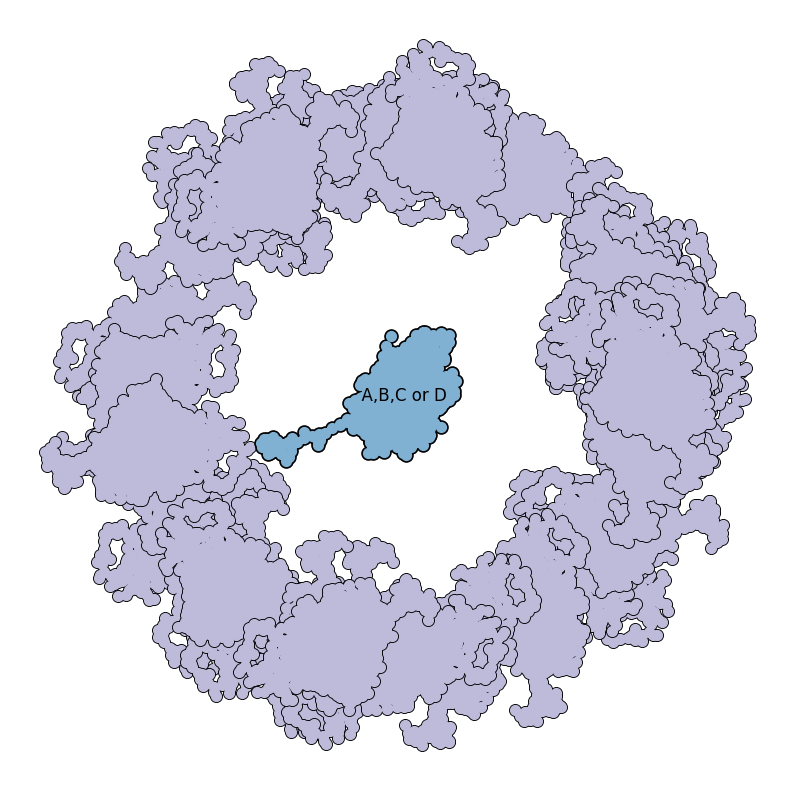

In [38]:
#Plot the coordinates
fig, ax = plt.subplots(figsize=(10, 10))
#ax.scatter(u0.atoms.positions[:, 0], u0.atoms.positions[:, 1], color='grey')

#chains = ["4", "s", "r", "c"]
chains = ["4"]
cmap= plt.get_cmap("Set3")
color0 = cmap(2)   # first color

for i in range(len(chains)):
    chain = chains[i]
    for rot in range(1, rotations + 1):
        for seed in seeds:
            key = f"chain_{chain}_seed{seed}_{rot:04d}"
            if key in dict_daft:
                                
                # Create a unique identifier for this configuration, exluce the first color
                
                config_id = rot * len(seeds) + list(seeds).index(seed)
                total_configs = rotations * len(seeds)
                
                # Use a colormap to get colors
                cmap = plt.colormaps['Set3']
                config_color = cmap(config_id / total_configs) 
                positions = dict_daft[key].positions_psbs
                ax.scatter(positions[:, 0], positions[:, 1], color='black', alpha=1,s=70)
                ax.scatter(positions[:, 0], positions[:, 1], color=color0, alpha=1,s=50)
                # Add label "A" at the center


# Plot PsbS
positions_chain = dict_daft[f"chain_{chains[0]}_seed{seeds[0]}_0001"].positions_chain
ax.scatter(positions_chain[:, 0], positions_chain[:, 1], color='black', alpha=1, s=90, label='PsbS')
ax.scatter(positions_chain[:, 0], positions_chain[:, 1], color=cmap(4), alpha=1, s=50, label='PsbS')
center = np.mean(positions_chain, axis=0)[:2]
ax.text(center[0], center[1], "  A,B,C or D", color='black', fontsize=12, 
                        ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0))

# Hide thicks
ax.set_xticks([])
ax.set_yticks([])

# Hide boarders
for spine in ax.spines.values():
    spine.set_visible(False)

plt.savefig('/martini/rubiz/Github/PsbS_Binding_Site/4_pairs/analysis/figures/simplified/partners.png', transparent=True, bbox_inches='tight', dpi=600)
plt.show()

# All coordinates

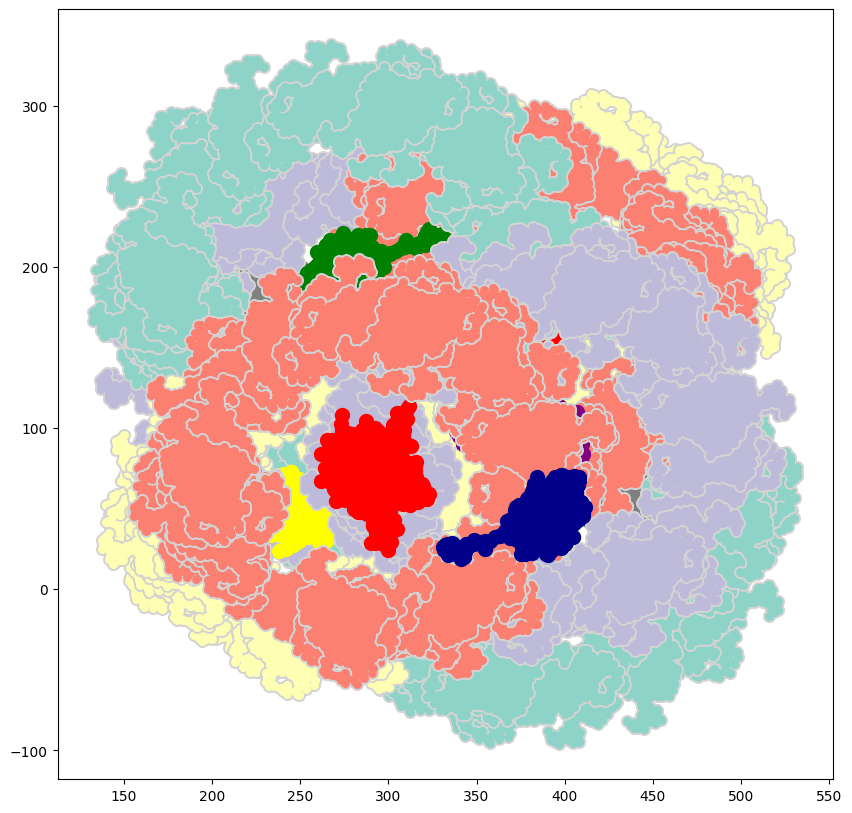

In [19]:
#Plot the coordinates
fig, ax = plt.subplots(figsize=(10, 10))
#ax.scatter(u0.atoms.positions[:, 0], u0.atoms.positions[:, 1], color='grey')
pallette = plt.colormaps['Set3']
#chains = ["4","s","r"]
chains = ["4", "s", "r", "c", "8", "S", "R", "C"]
x_limits = [0,500]
y_limits = [0,500]
cmap= plt.get_cmap("Set3")
colors = [cmap(0), cmap(1), cmap(2), cmap(3), cmap(0), cmap(1), cmap(2), cmap(3)]

dark_colors = ["green", "yellow","purple","red", "green", "yellow","purple","red"]
ax.scatter(u0.atoms.positions[:, 0], u0.atoms.positions[:, 1], color='grey', alpha=1, s=80)
for i in range(len(chains)):
    chain = chains[i]
    color = colors[i]
    dark_color = dark_colors[i]
    positions_chain = dict_daft[f"chain_{chain}_seed{seeds[0]}_0001"].positions_chain
    ax.scatter(positions_chain[:, 0], positions_chain[:, 1], color=dark_color, alpha=1, s=100, label='PsbS')
    for rot in range(1, rotations + 1):
        for seed in seeds:
            key = f"chain_{chain}_seed{seed}_{rot:04d}"
            if key in dict_daft:
                                
                # Create a unique identifier for this configuration, exluce the first color
             
                positions = dict_daft[key].positions_psbs
                ax.scatter(positions[:, 0], positions[:, 1], color="lightgrey", alpha=1,s=70)
                ax.scatter(positions[:, 0], positions[:, 1], color=color, alpha=1,s=30)

#ax.set_xlim(x_limits)
#ax.set_ylim(y_limits)

# Plot PsbS
positions_chain = dict_daft[f"chain_{chains[0]}_seed{seeds[0]}_0001"].positions_chain

ax.scatter(positions_chain[:, 0], positions_chain[:, 1], color='darkblue', alpha=1, s=100, label='PsbS')

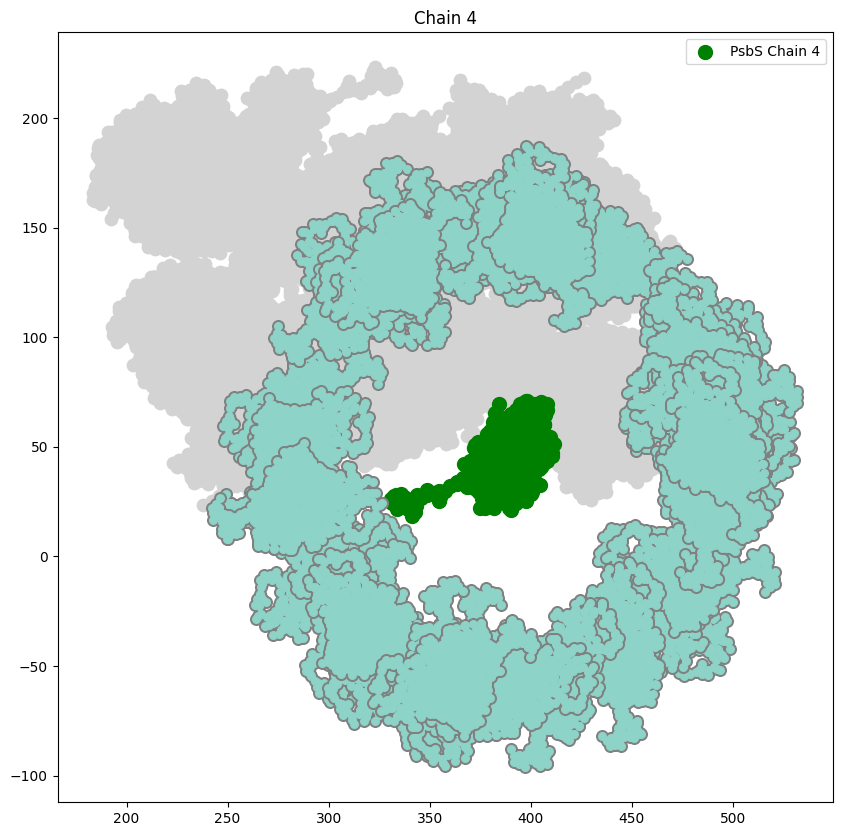

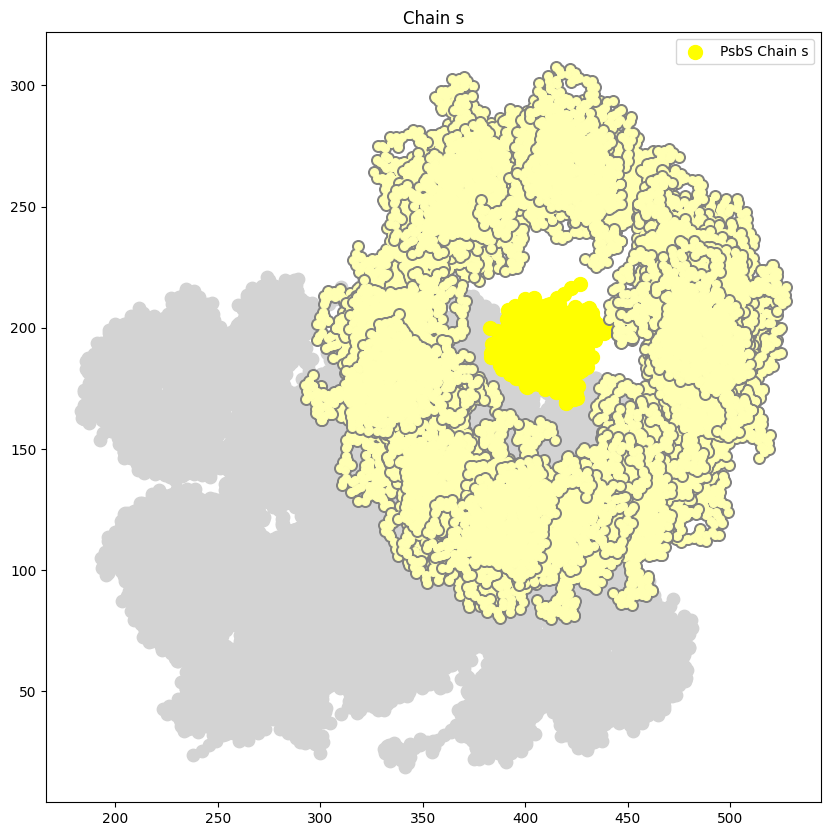

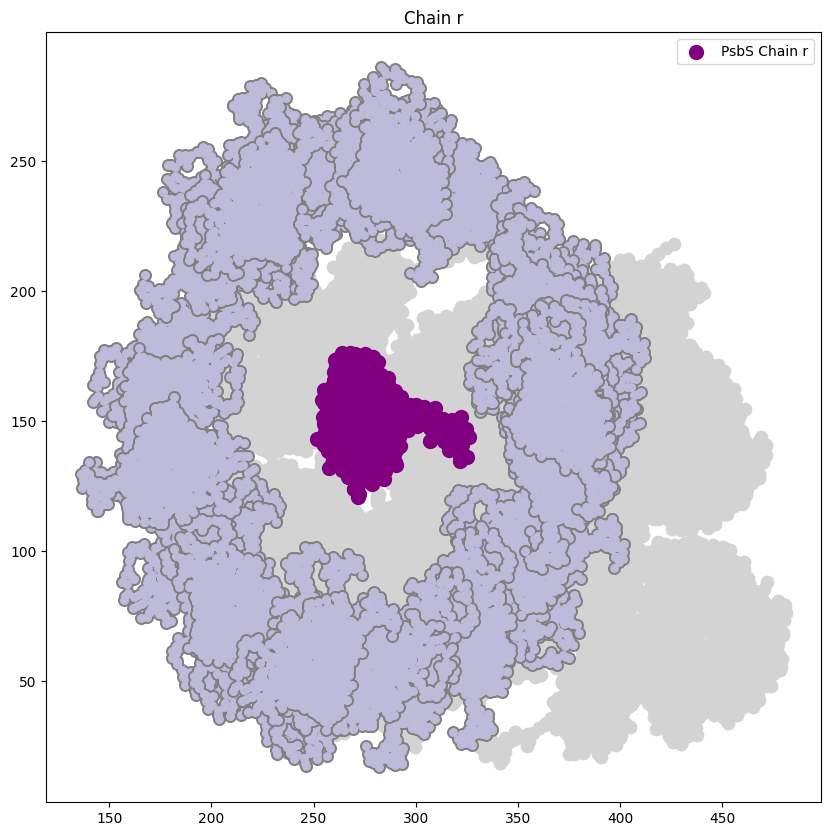

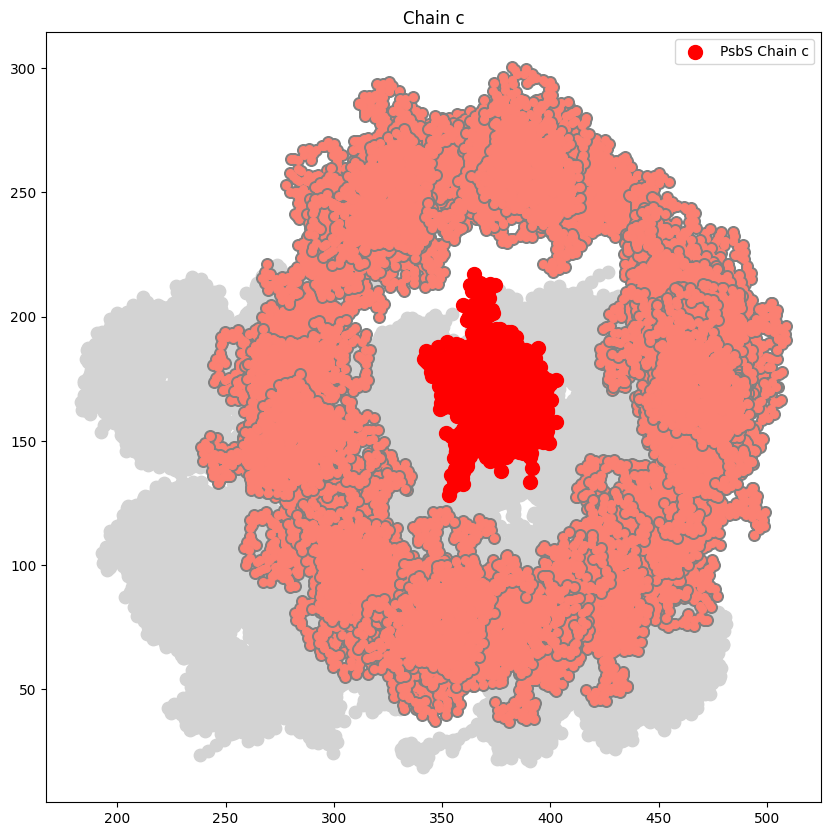

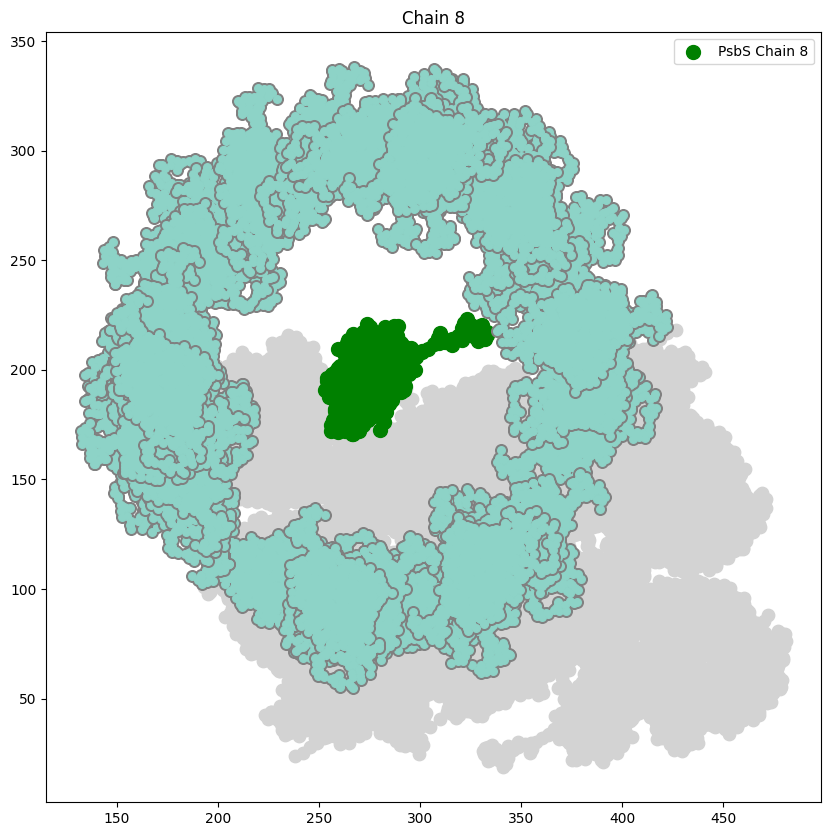

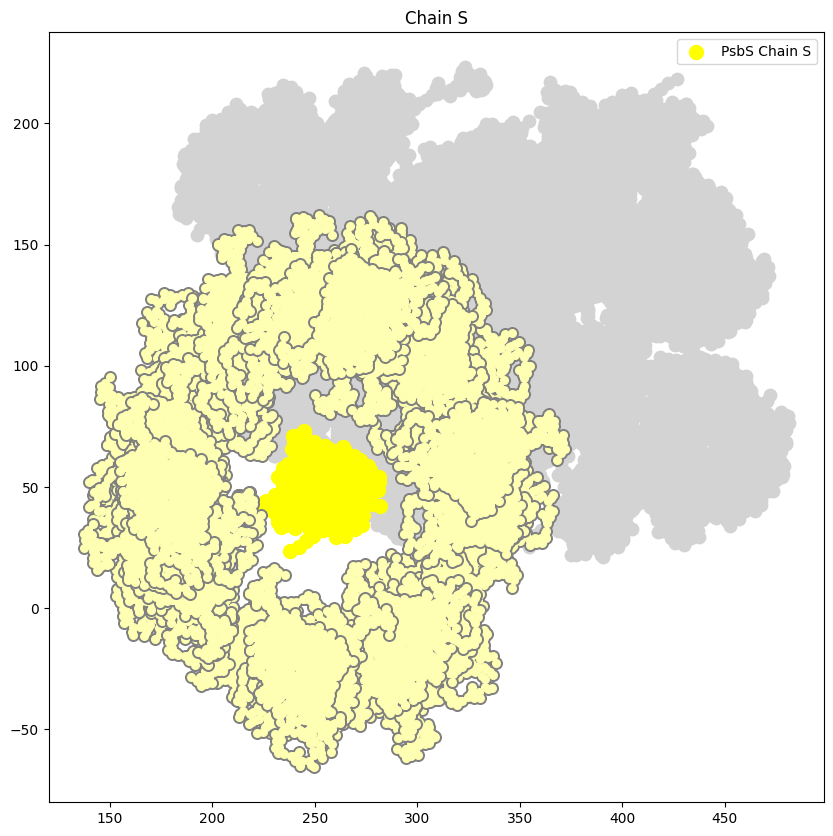

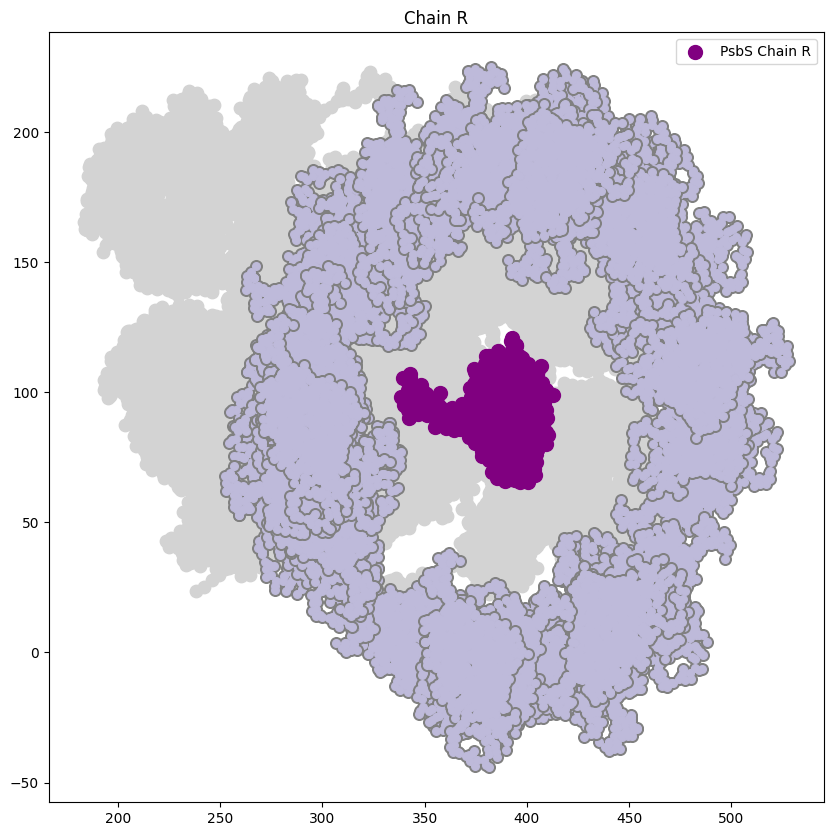

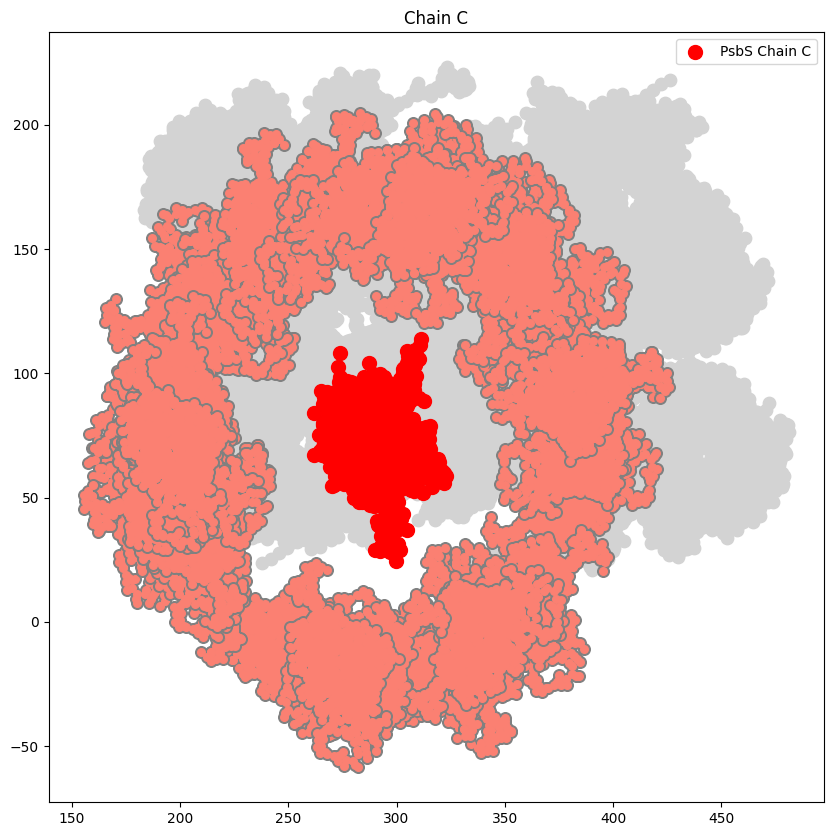

In [20]:
# Create separate figures for each chain
for i in range(len(chains)):
    chain = chains[i]
    color = colors[i]
    dark_color = dark_colors[i]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(u0.atoms.positions[:, 0], u0.atoms.positions[:, 1], color='lightgrey', alpha=1, s=80)
    x_limits = [-250,550]
    y_limits = [0,350]


    # Plot PsbS chain
    positions_chain = dict_daft[f"chain_{chain}_seed{seeds[0]}_0001"].positions_chain
    ax.scatter(positions_chain[:, 0], positions_chain[:, 1], color=dark_color, alpha=1, s=100, label=f'PsbS Chain {chain}')
    
    # Plot all rotations and seeds for this chain
    for rot in range(1, rotations + 1):
        for seed in seeds:
            key = f"chain_{chain}_seed{seed}_{rot:04d}"
            if key in dict_daft:
                positions = dict_daft[key].positions_psbs
                ax.scatter(positions[:, 0], positions[:, 1], color="grey", alpha=1, s=70)
                ax.scatter(positions[:, 0], positions[:, 1], color=color, alpha=1, s=30)
    #ax.set_xlim(x_limits)
    #ax.set_ylim(y_limits)
    
    ax.legend()
    ax.set_title(f'Chain {chain}')
    plt.show()


In [21]:
threshold = 8  # Angstroms
for key, u in dict_daft.items():
    pos1 = dict_daft[key].positions_psbs
    distances = cdist(pos0, pos1)
    min_distance = np.min(distances)  # Closest approach
    dict_daft[key].intersects = min_distance < threshold

In [22]:
# Print how many configurations intersect with the PSII
intersecting_configs = [key for key, u in dict_daft.items() if u.intersects]
print(f"Number of configurations intersecting with PSII: {len(intersecting_configs)}")


Number of configurations intersecting with PSII: 242


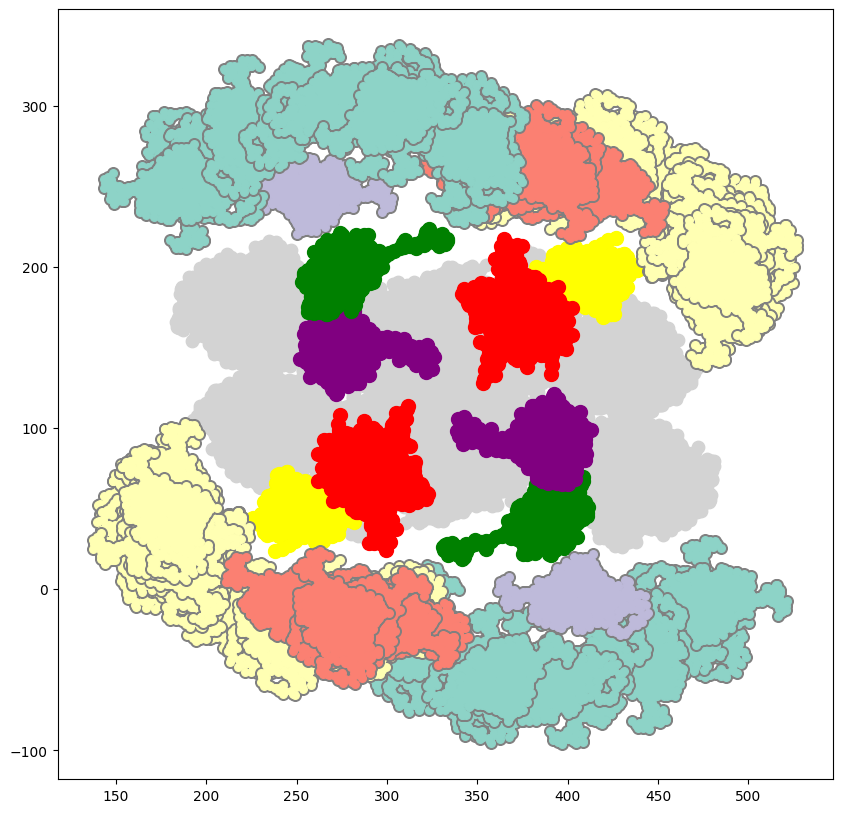

In [23]:
#Plot the coordinates
fig, ax = plt.subplots(figsize=(10, 10))
#ax.scatter(u0.atoms.positions[:, 0], u0.atoms.positions[:, 1], color='grey')
pallette = plt.colormaps['Set3']
#chains = ["4","s","r"]
chains = ["4", "s", "r", "c", "8", "S", "R", "C"]
x_limits = [-250,550]
y_limits = [0,350]

cmap= plt.get_cmap("Set3")
colors = [cmap(0), cmap(1), cmap(2), cmap(3), cmap(0), cmap(1), cmap(2), cmap(3)]

dark_colors = ["green", "yellow","purple","red", "green", "yellow","purple","red"]
ax.scatter(pos0[:, 0], pos0[:, 1], color='lightgrey', alpha=1, s=80)
for i in range(len(chains)):
    chain = chains[i]
    color = colors[i]
    dark_color = dark_colors[i]
    positions_chain = dict_daft[f"chain_{chain}_seed{seeds[0]}_0001"].positions_chain
    ax.scatter(positions_chain[:, 0], positions_chain[:, 1], color=dark_color, alpha=1, s=100, label='PsbS')
    for rot in range(1, rotations + 1):
        for seed in seeds:
            key = f"chain_{chain}_seed{seed}_{rot:04d}"
            if key in dict_daft:
                                
                if dict_daft[key].intersects == False:
                    # Create a unique identifier for this configuration, exluce the first color
                    positions = dict_daft[key].positions_psbs
                    ax.scatter(positions[:, 0], positions[:, 1], color="grey", alpha=1,s=70)
                    ax.scatter(positions[:, 0], positions[:, 1], color=color, alpha=1,s=30)
#ax.set_xlim(x_limits)
#ax.set_ylim(y_limits)

# Plot PsbS
#positions_chain = dict_daft[f"chain_{chains[0]}_seed{seeds[0]}_0001"].positions_chain

#ax.scatter(positions_chain[:, 0], positions_chain[:, 1], color='darkblue', alpha=1, s=100, label='PsbS')

In [24]:
# Get bounds from NON-intersecting coordinates (the ones we want to bin)
non_intersecting_positions = []
for key in dict_daft:
    if not dict_daft[key].intersects:
        non_intersecting_positions.append(dict_daft[key].positions_psbs)

all_positions = np.concatenate(non_intersecting_positions)
x_min, x_max = np.min(all_positions[:, 0]), np.max(all_positions[:, 0])
y_min, y_max = np.min(all_positions[:, 1]), np.max(all_positions[:, 1])

# Create 8 regions (4x2 grid)
nx_bins = 4  # 4 columns
ny_bins = 2  # 2 rows
x_bins = np.linspace(x_min, x_max, nx_bins + 1)  # 5 edges for 4 bins
y_bins = np.linspace(y_min, y_max, ny_bins + 1)  # 3 edges for 2 bins

# Assign region IDs starting from 1
for key, u in dict_daft.items():
    if not dict_daft[key].intersects:
        center = np.mean(dict_daft[key].positions_psbs, axis=0)[:2]
        
        # Find which bin the center falls into
        x_idx = np.digitize(center[0], x_bins) - 1
        y_idx = np.digitize(center[1], y_bins) - 1
        
        # Clamp indices to valid range
        x_idx = max(0, min(x_idx, nx_bins - 1))  # 0, 1, 2, or 3
        y_idx = max(0, min(y_idx, ny_bins - 1))  # 0 or 1
        
        # Assign region ID starting from 1 (1-8 for 8 regions)
        dict_daft[key].region_id = y_idx * nx_bins + x_idx + 1
    else:
        dict_daft[key].region_id = None

unique_region_ids = set(u.region_id for u in dict_daft.values() if u.region_id is not None)
print(f"Unique region IDs: {unique_region_ids}")
print(f"Number of regions: {len(unique_region_ids)}")

Unique region IDs: {1, 2, 3, 4, 5, 6, 7, 8}
Number of regions: 8


Found 78 non-intersecting configurations
Regions: [1 2 3 4 5 6 7 8]


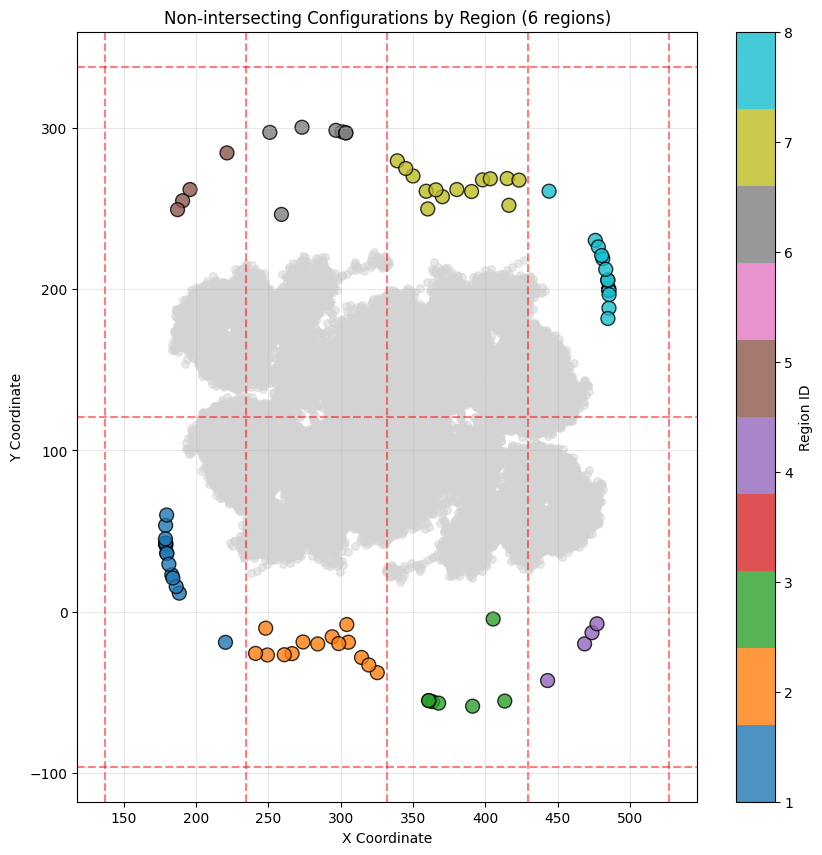

In [25]:
# Create new figure for plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot PSII background
ax.scatter(pos0[:, 0], pos0[:, 1], color='lightgrey', alpha=0.5, s=30)

# Collect data for scatter plot with colorbar
centers = []
region_ids = []

for key, u in dict_daft.items():
    if hasattr(dict_daft[key], 'region_id') and dict_daft[key].region_id is not None:
        center = np.mean(dict_daft[key].positions_psbs, axis=0)[:2]
        centers.append(center)
        region_ids.append(dict_daft[key].region_id)

# Convert to numpy arrays
centers = np.array(centers)
region_ids = np.array(region_ids)

# Create scatter plot with colorbar
if len(centers) > 0:
    scatter = ax.scatter(centers[:, 0], centers[:, 1], c=region_ids, 
                        cmap='tab10', alpha=0.8, s=100, edgecolors='black')
    plt.colorbar(scatter, label='Region ID')
    
    # Add grid lines to show regions
    for x in x_bins:
        ax.axvline(x, color='red', linestyle='--', alpha=0.5)
    for y in y_bins:
        ax.axhline(y, color='red', linestyle='--', alpha=0.5)
    
    print(f"Found {len(centers)} non-intersecting configurations")
    print(f"Regions: {np.unique(region_ids)}")
else:
    print("No non-intersecting configurations found!")

# Show the plot
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Non-intersecting Configurations by Region (6 regions)')
ax.grid(True, alpha=0.3)
plt.show()


In [26]:
# Print the number of configurations per region
region_counts = {}
for key, u in dict_daft.items():
    if hasattr(dict_daft[key], 'region_id') and dict_daft[key].region_id is not None:
        region_id = dict_daft[key].region_id
        if region_id in region_counts:
            region_counts[region_id] += 1
        else:
            region_counts[region_id] = 1

# Print the number of configurations per region
print("Number of configurations per region:")
for region_id, count in region_counts.items():
    print(f"Region {region_id}: {count} configurations")

#region with the less configurations
min_region_id = min(region_counts, key=region_counts.get) if region_counts else None
print(f"Region with the least configurations: {min_region_id} with {region_counts.get(min_region_id, 0)} configurations")   

# Randomly select configurations from each region (limit to the count of the smallest region)
seed = 42
random.seed(seed)

filtered = {}
for region_id, count in region_counts.items():
    if count > 0:
        # Get all configurations in this region
        configs_in_region = [key for key, u in dict_daft.items() if hasattr(u, 'region_id') and u.region_id == region_id]
        if configs_in_region:
            # Select min_region_id number of configurations (or all if fewer available)
            #num_to_select = min(len(configs_in_region), region_counts.get(min_region_id, 0))
            selected_configs = random.sample(configs_in_region, k=min_region_id)
            for selected_config in selected_configs:
                filtered[selected_config] = dict_daft[selected_config]

# Create dictionary to group configurations by region
odd_regions_dict = {}
for key, u in filtered.items():
    if hasattr(u, 'region_id') and u.region_id is not None:
        region_id = u.region_id

        #Check if the region_id is odd
        if region_id % 2 == 1:
            if region_id not in odd_regions_dict:
                odd_regions_dict[region_id] = []
            odd_regions_dict[region_id].append(key)

even_regions_dict = {}
for key, u in filtered.items():
    if hasattr(u, 'region_id') and u.region_id is not None:
        region_id = u.region_id
        #Check if the region_id is even
        if region_id % 2 == 0:
            if region_id not in even_regions_dict:
                even_regions_dict[region_id] = []
            even_regions_dict[region_id].append(key)




Number of configurations per region:
Region 4: 4 configurations
Region 2: 14 configurations
Region 3: 7 configurations
Region 8: 14 configurations
Region 7: 14 configurations
Region 6: 7 configurations
Region 5: 4 configurations
Region 1: 14 configurations
Region with the least configurations: 4 with 4 configurations


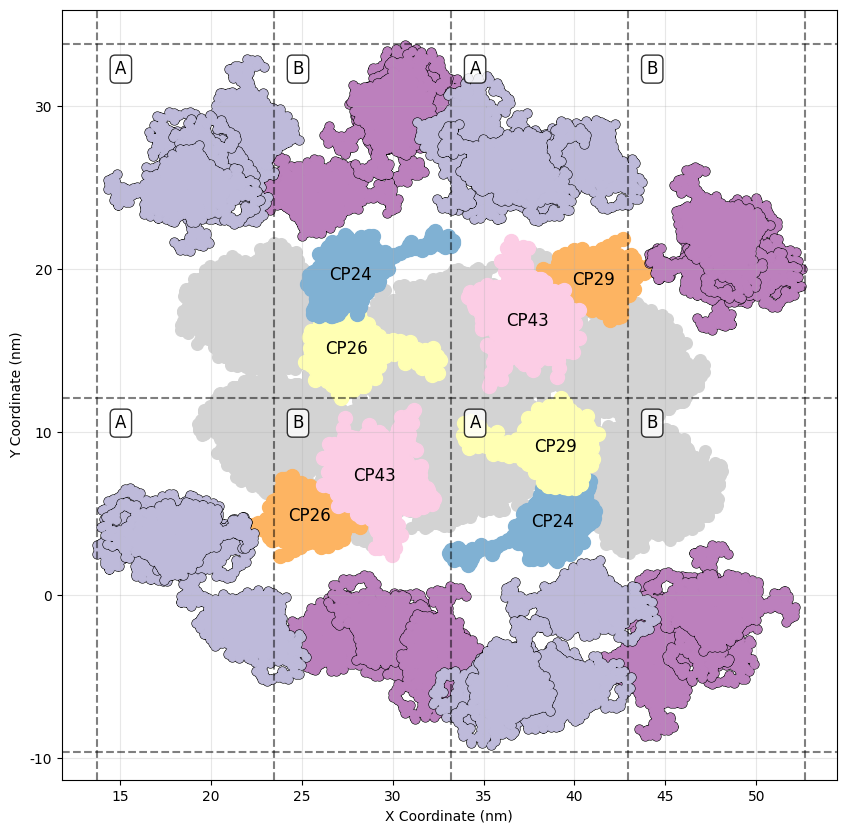

In [27]:
# Create new figure for plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot PSII background
ax.scatter(pos0[:, 0], pos0[:, 1], color='lightgrey', alpha=1, s=70)
chains = ["4", "s", "r", "c", "8", "S", "R", "C"]
cmap= plt.get_cmap("Set3")

colors = [cmap(0), cmap(1), cmap(2), cmap(3), cmap(4), cmap(5), cmap(6), cmap(7)]
colors_plot = [cmap(4), colors[5], colors[1], colors[7],cmap(4), colors[5], colors[1], colors[7]] 
labels_plot = ["CP24", "CP29", "CP26", "CP43", "CP24", "CP26", "CP29", "CP43"]
for i in range(len(chains)):
    chain = chains[i]
    color = colors_plot[i]
    positions_chain = dict_daft[f"chain_{chain}_seed{seeds[0]}_0001"].positions_chain
    ax.scatter(positions_chain[:, 0], positions_chain[:, 1], color=color, alpha=1, s=100)
    #Get the center of geometry and plot the label
    center_of_geometry = np.mean(positions_chain, axis=0)[:2]
    ax.text(center_of_geometry[0], center_of_geometry[1], labels_plot[i], color='black', fontsize=12, 
            ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0))

# Collect data for scatter plot with colorbar
centers = []
region_ids = []

# Plot filtered configurations
for region_id, config_keys in even_regions_dict.items():
    for key in config_keys:
        if hasattr(dict_daft[key], 'region_id') and dict_daft[key].region_id is not None:
            positions = dict_daft[key].positions_psbs
            ax.scatter(positions[:, 0], positions[:, 1], color="black", alpha=1, s=40)
            ax.scatter(positions[:, 0], positions[:, 1], color=cmap(9), alpha=1, s=30)
            # Collect center and region_id for colorbar
            center = np.mean(positions, axis=0)[:2]
            centers.append(center)
            region_ids.append(dict_daft[key].region_id)

for region_id, config_keys in odd_regions_dict.items():
    for key in config_keys:
        if hasattr(dict_daft[key], 'region_id') and dict_daft[key].region_id is not None:
            positions = dict_daft[key].positions_psbs
            ax.scatter(positions[:, 0], positions[:, 1], color="black", alpha=1, s=40)
            ax.scatter(positions[:, 0], positions[:, 1], color=cmap(2), alpha=1, s=30)
            # Collect center and region_id for colorbar
            center = np.mean(positions, axis=0)[:2]
            centers.append(center)
            region_ids.append(dict_daft[key].region_id)

# Convert to numpy arrays

# Add grid lines to show regions
for x in x_bins:
    ax.axvline(x, color='black', linestyle='--', alpha=0.5)
for y in y_bins:
    ax.axhline(y, color='black', linestyle='--', alpha=0.5)

labels = ["A", "B", "A", "B", "A", "B", "A", "B"]
# At the top-left of each region, add the region ID
for label, region_id in zip(labels, np.unique(region_ids)):
    # Calculate which bin this region corresponds to
    bin_x = (region_id - 1) % nx_bins  # Convert region_id back to x bin index
    bin_y = (region_id - 1) // nx_bins  # Convert region_id back to y bin index
    
    # Get the top-left corner coordinates
    x_left = x_bins[bin_x]
    y_top = y_bins[bin_y + 1] if bin_y + 1 < len(y_bins) else y_bins[bin_y]
    
    ax.text(x_left + 10, y_top - 10, label, color='black', fontsize=12, 
            ha='left', va='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
x_ticks = ax.get_xticks()
x_ticks_nm = [f"{x_tick / 10:.0f}" for x_tick in x_ticks]
ax.set_xticklabels(x_ticks_nm)
y_ticks = ax.get_yticks()
y_ticks_nm = [f"{y_tick / 10:.0f}" for y_tick in y_ticks]
ax.set_yticklabels(y_ticks_nm)

# Show the plot
ax.set_xlabel('X Coordinate (nm)')
ax.set_ylabel('Y Coordinate (nm)')
#ax.set_title('Non-intersecting Configurations by Region (6 regions)')
ax.grid(True, alpha=0.3)
plt.show()


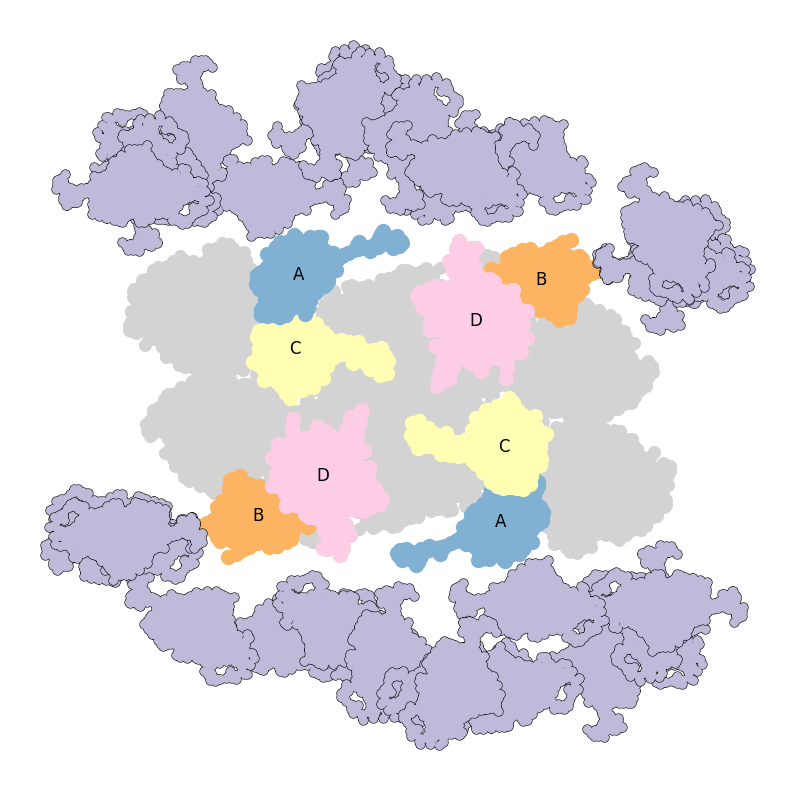

In [45]:
# Create new figure for plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot PSII background
ax.scatter(pos0[:, 0], pos0[:, 1], color='lightgrey', alpha=1, s=70)
chains = ["4", "s", "r", "c", "8", "S", "R", "C"]
cmap= plt.get_cmap("Set3")

colors = [cmap(0), cmap(1), cmap(2), cmap(3), cmap(4), cmap(5), cmap(6), cmap(7)]
colors_plot = [cmap(4), colors[5], colors[1], colors[7],cmap(4), colors[5], colors[1], colors[7]] 
labels_plot = ["A", "B", "C", "D", "A", "B", "C", "D"]
for i in range(len(chains)):
    chain = chains[i]
    color = colors_plot[i]
    positions_chain = dict_daft[f"chain_{chain}_seed{seeds[0]}_0001"].positions_chain
    ax.scatter(positions_chain[:, 0], positions_chain[:, 1], color=color, alpha=1, s=100)
    #Get the center of geometry and plot the label
    center_of_geometry = np.mean(positions_chain, axis=0)[:2]
    ax.text(center_of_geometry[0], center_of_geometry[1], labels_plot[i], color='black', fontsize=12, 
            ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0))

# Collect data for scatter plot with colorbar
centers = []
region_ids = []

# Plot filtered configurations
for region_id, config_keys in even_regions_dict.items():
    for key in config_keys:
        if hasattr(dict_daft[key], 'region_id') and dict_daft[key].region_id is not None:
            positions = dict_daft[key].positions_psbs
            ax.scatter(positions[:, 0], positions[:, 1], color="black", alpha=1, s=40)
            ax.scatter(positions[:, 0], positions[:, 1], color=cmap(2), alpha=1, s=30)
            # Collect center and region_id for colorbar
            center = np.mean(positions, axis=0)[:2]
            centers.append(center)
            region_ids.append(dict_daft[key].region_id)

for region_id, config_keys in odd_regions_dict.items():
    for key in config_keys:
        if hasattr(dict_daft[key], 'region_id') and dict_daft[key].region_id is not None:
            positions = dict_daft[key].positions_psbs
            ax.scatter(positions[:, 0], positions[:, 1], color="black", alpha=1, s=40)
            ax.scatter(positions[:, 0], positions[:, 1], color=cmap(2), alpha=1, s=30)
            # Collect center and region_id for colorbar
            center = np.mean(positions, axis=0)[:2]
            centers.append(center)
            region_ids.append(dict_daft[key].region_id)

# Convert to numpy arrays

# Add grid lines to show regions
#for x in x_bins:
#    ax.axvline(x, color='black', linestyle='--', alpha=0.5)
#for y in y_bins:
#    ax.axhline(y, color='black', linestyle='--', alpha=0.5)
#
#labels = ["A", "B", "A", "B", "A", "B", "A", "B"]
## At the top-left of each region, add the region ID
#for label, region_id in zip(labels, np.unique(region_ids)):
#    # Calculate which bin this region corresponds to
#    bin_x = (region_id - 1) % nx_bins  # Convert region_id back to x bin index
#    bin_y = (region_id - 1) // nx_bins  # Convert region_id back to y bin index
#    
#    # Get the top-left corner coordinates
#    x_left = x_bins[bin_x]
#    y_top = y_bins[bin_y + 1] if bin_y + 1 < len(y_bins) else y_bins[bin_y]
#    
#    ax.text(x_left + 10, y_top - 10, label, color='black', fontsize=12, 
#            ha='left', va='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
x_ticks = ax.get_xticks()
x_ticks_nm = [f"{x_tick / 10:.0f}" for x_tick in x_ticks]
ax.set_xticklabels(x_ticks_nm)
y_ticks = ax.get_yticks()
y_ticks_nm = [f"{y_tick / 10:.0f}" for y_tick in y_ticks]
ax.set_yticklabels(y_ticks_nm)

# Show the plot
#ax.set_xlabel('X Coordinate (nm)')
#ax.set_ylabel('Y Coordinate (nm)')
# Hide borders
for spine in ax.spines.values():
    spine.set_visible(False)

#Hide thicks
ax.set_xticks([])
ax.set_yticks([])

#ax.set_title('Non-intersecting Configurations by Region (6 regions)')
ax.grid(True, alpha=0.3)

# Save without background
plt.savefig('/martini/rubiz/Github/PsbS_Binding_Site/4_pairs/analysis/figures/simplified/psii_and_binding.png', transparent=True, bbox_inches='tight', dpi=600)
plt.show()


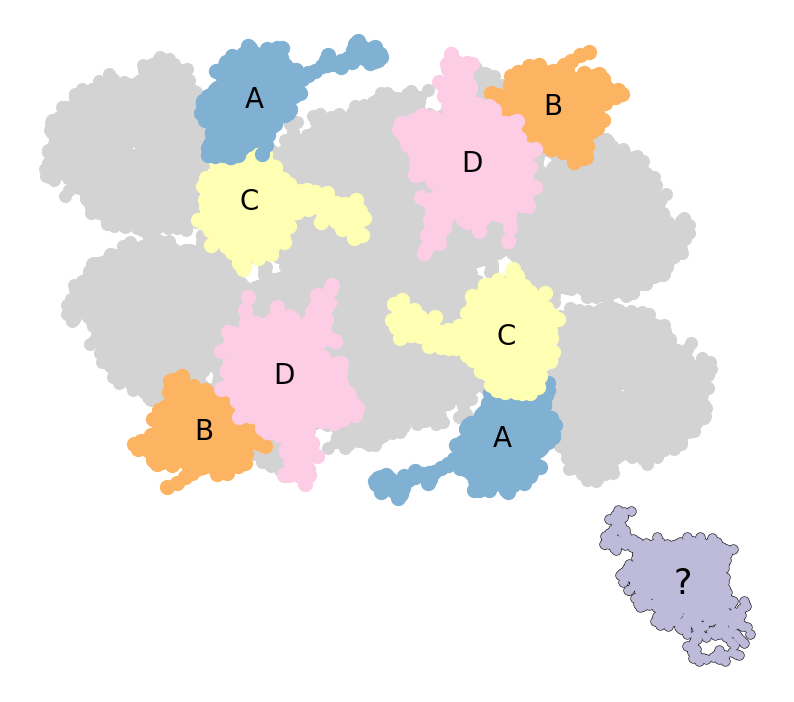

In [46]:
# Create new figure for plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot PSII background
ax.scatter(pos0[:, 0], pos0[:, 1], color='lightgrey', alpha=1, s=70)
chains = ["4", "s", "r", "c", "8", "S", "R", "C"]
cmap= plt.get_cmap("Set3")

colors = [cmap(0), cmap(1), cmap(2), cmap(3), cmap(4), cmap(5), cmap(6), cmap(7)]
colors_plot = [cmap(4), colors[5], colors[1], colors[7],cmap(4), colors[5], colors[1], colors[7]] 
labels_plot = ["A", "B", "C", "D", "A", "B", "C", "D"]
for i in range(len(chains)):
    chain = chains[i]
    color = colors_plot[i]
    positions_chain = dict_daft[f"chain_{chain}_seed{seeds[0]}_0001"].positions_chain
    ax.scatter(positions_chain[:, 0], positions_chain[:, 1], color=color, alpha=1, s=100)
    #Get the center of geometry and plot the label
    center_of_geometry = np.mean(positions_chain, axis=0)[:2]
    ax.text(center_of_geometry[0], center_of_geometry[1], labels_plot[i], color='black', fontsize=20, 
            ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0))

# Collect data for scatter plot with colorbar
#centers = []
#region_ids = []
#
## Plot filtered configurations (only one)
if even_regions_dict:
    first_region_id = next(iter(even_regions_dict))
    config_keys = even_regions_dict[first_region_id]
    if config_keys:
        key = config_keys[0]  # Take the first key
        if hasattr(dict_daft[key], 'region_id') and dict_daft[key].region_id is not None:
            positions = dict_daft[key].positions_psbs
            ax.scatter(positions[:, 0], positions[:, 1], color="black", alpha=1, s=40)
            ax.scatter(positions[:, 0], positions[:, 1], color=cmap(2), alpha=1, s=30)
            # Add label "A" at the center
            center = np.mean(positions, axis=0)[:2]
            ax.text(center[0], center[1], "?", color='black', fontsize=25, 
                    ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0))
            # Collect center and region_id for colorbar
            centers.append(center)
            region_ids.append(dict_daft[key].region_id)
#
#for region_id, config_keys in odd_regions_dict.items():
#    for key in config_keys:
#        if hasattr(dict_daft[key], 'region_id') and dict_daft[key].region_id is not None:
#            positions = dict_daft[key].positions_psbs
#            ax.scatter(positions[:, 0], positions[:, 1], color="black", alpha=1, s=40)
#            ax.scatter(positions[:, 0], positions[:, 1], color=cmap(2), alpha=1, s=30)
#            # Collect center and region_id for colorbar
#            center = np.mean(positions, axis=0)[:2]
#            centers.append(center)
#            region_ids.append(dict_daft[key].region_id)

# Convert to numpy arrays

# Add grid lines to show regions
#for x in x_bins:
#    ax.axvline(x, color='black', linestyle='--', alpha=0.5)
#for y in y_bins:
#    ax.axhline(y, color='black', linestyle='--', alpha=0.5)
#
#labels = ["A", "B", "A", "B", "A", "B", "A", "B"]
## At the top-left of each region, add the region ID
#for label, region_id in zip(labels, np.unique(region_ids)):
#    # Calculate which bin this region corresponds to
#    bin_x = (region_id - 1) % nx_bins  # Convert region_id back to x bin index
#    bin_y = (region_id - 1) // nx_bins  # Convert region_id back to y bin index
#    
#    # Get the top-left corner coordinates
#    x_left = x_bins[bin_x]
#    y_top = y_bins[bin_y + 1] if bin_y + 1 < len(y_bins) else y_bins[bin_y]
#    
#    ax.text(x_left + 10, y_top - 10, label, color='black', fontsize=12, 
#            ha='left', va='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
x_ticks = ax.get_xticks()
x_ticks_nm = [f"{x_tick / 10:.0f}" for x_tick in x_ticks]
ax.set_xticklabels(x_ticks_nm)
y_ticks = ax.get_yticks()
y_ticks_nm = [f"{y_tick / 10:.0f}" for y_tick in y_ticks]
ax.set_yticklabels(y_ticks_nm)

# Show the plot
#ax.set_xlabel('X Coordinate (nm)')
#ax.set_ylabel('Y Coordinate (nm)')
ax.set_aspect('equal')

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])

# Hide borders
for spine in ax.spines.values():
    spine.set_visible(False)

#ax.set_title('Non-intersecting Configurations by Region (6 regions)')
ax.grid(True, alpha=0.3)

plt.savefig('/martini/rubiz/Github/PsbS_Binding_Site/4_pairs/analysis/figures/simplified/psii_letters.png', transparent=True, bbox_inches='tight', dpi=600)

plt.show()




# Initial configurations

In [30]:
# Split the odd and even region in the number of configurations
dict_split = {}
keys1 = list(even_regions_dict.values())
keys2 = list(odd_regions_dict.keys())
u1 = []
u2 = []
for i in range(min_region_id):
    region = i+1
    values1 = list({k: v[i] for k, v in odd_regions_dict.items()}.values()) # n element of each key
    values2 = list({k: v[i] for k, v in even_regions_dict.items()}.values()) # n element of each key
    group1 = [u0.select_atoms("all")] # Add PSII
    group2 = [u0.select_atoms("all")]
    for j in range(len(values1)):
        selection = dict_daft[values1[j]].select_atoms("chainID A B").copy()
        group1.append(selection)
        selection = dict_daft[values2[j]].select_atoms("chainID A B").copy()
        group2.append(selection)
    u1.append(group1)
    u2.append(group2)

    
 



In [31]:
for i in range(len(u1)):
    universe1 =  mda.Merge(*u1[i])
    universe2 =  mda.Merge(*u2[i])#
    filename1 = f"{dir5}/psii_psbs/initial_structures/sim1_{i+1}.pdb"
    filename2 = f"{dir5}/psii_psbs/initial_structures/sim2_{i+1}.pdb"

    universe1.atoms.write(filename1)
    universe2.atoms.write(filename2)

In [32]:
dict_merged1 = {}
dict_merged2 = {}

for i in range(len(u1)):
    filename1 = f"{dir5}/psii_psbs/initial_structures/sim1_{i+1}.pdb"
    filename2 = f"{dir5}/psii_psbs/initial_structures/sim2_{i+1}.pdb"
    dict_merged1[filename1] = mda.Universe(filename1)
    dict_merged2[filename2] = mda.Universe(filename2)



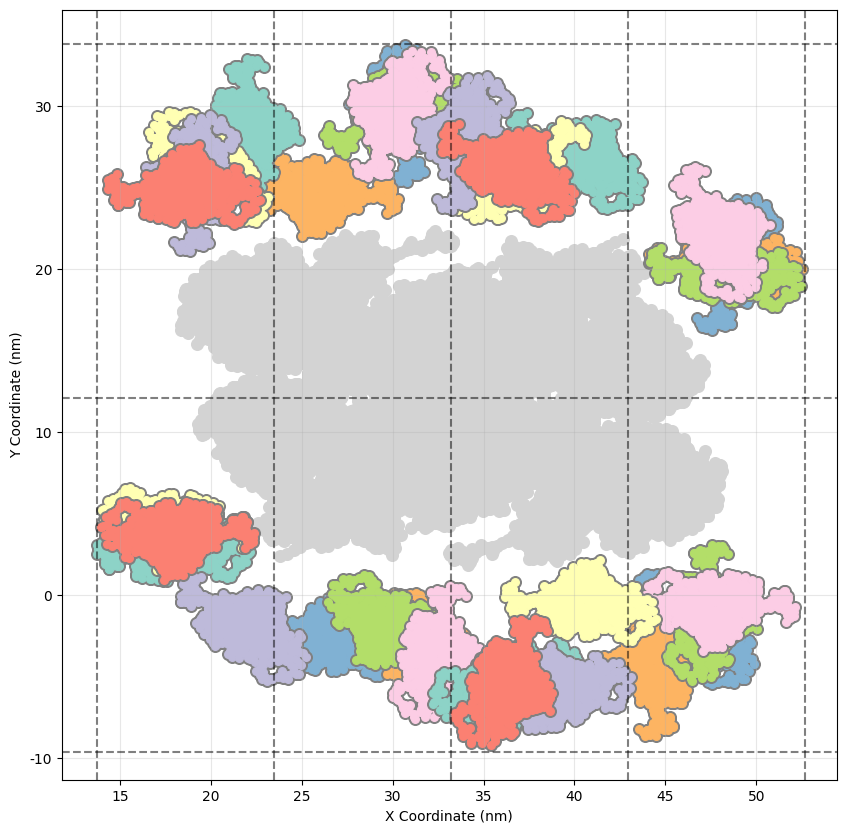

In [33]:
# Create new figure for plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot PSII background
ax.scatter(pos0[:, 0], pos0[:, 1], color='lightgrey', alpha=1, s=70)

# Collect data for scatter plot with colorbar
# Collect data for scatter plot with colorbar
centers = []
region_ids = []

# Get first 4 colors for dict_merged1 and next 4 for dict_merged2
colors1 = [cmap(i) for i in range(4)]       # First 4 colors: 0, 1, 2, 3
colors2 = [cmap(i) for i in range(4, 8)]    # Next 4 colors: 4, 5, 6, 7

# Plot the universes from dict_merged2
for i, (key, u) in enumerate(dict_merged2.items()):
    positions = u.select_atoms("chainID A B and not id 0:32588").positions  # Only chainID A
    ax.scatter(positions[:, 0], positions[:, 1], color="grey", alpha=1, s=70)
    color_idx = i % len(colors2)  # Cycle through colors2
    ax.scatter(positions[:, 0], positions[:, 1], color=colors2[color_idx], alpha=1, s=30)
    
    # Collect center and region_id for colorbar
    center = np.mean(positions, axis=0)[:2]
    centers.append(center)
    region_ids.append(int(key.split('_')[-1].split('.')[0]))  # Extract region ID from filename

# Plot the universes from dict_merged1
for i, (key, u) in enumerate(dict_merged1.items()):
   positions = u.select_atoms("chainID A B and not id 0:32588").positions
   ax.scatter(positions[:, 0], positions[:, 1], color="grey", alpha=1, s=70)
   color_idx = i % len(colors1)  # Cycle through colors1
   ax.scatter(positions[:, 0], positions[:, 1], color=colors1[color_idx], alpha=1, s=30)
   
   # Collect center and region_id for colorbar
   center = np.mean(positions, axis=0)[:2]
   centers.append(center)
   region_ids.append(int(key.split('_')[-1].split('.')[0]))  # Extract region ID from filename

# Add grid lines to show regions
for x in x_bins:
    ax.axvline(x, color='black', linestyle='--', alpha=0.5)
for y in y_bins:
    ax.axhline(y, color='black', linestyle='--', alpha=0.5)

#labels = ["A", "B", "A", "B", "A", "B", "A", "B"]
## At the top-left of each region, add the region ID for all 8 regions
#all_region_ids = list(range(1, 9))  # [1, 2, 3, 4, 5, 6, 7, 8]
#for label, region_id in zip(labels, all_region_ids):
#    # Calculate which bin this region corresponds to
#    bin_x = (region_id - 1) % nx_bins  # Convert region_id back to x bin index
#    bin_y = (region_id - 1) // nx_bins  # Convert region_id back to y bin index
#    
#    # Get the top-left corner coordinates
#    x_left = x_bins[bin_x]
#    y_top = y_bins[bin_y + 1] if bin_y + 1 < len(y_bins) else y_bins[bin_y]
#    
#    ax.text(x_left + 10, y_top - 10, label, color='black', fontsize=12, 
#            ha='left', va='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Show the plot
# Convert the x axis to nanometers
x_ticks = ax.get_xticks()
x_ticks_nm = [f"{x_tick / 10:.0f}" for x_tick in x_ticks]
ax.set_xticklabels(x_ticks_nm)
y_ticks = ax.get_yticks()
y_ticks_nm = [f"{y_tick / 10:.0f}" for y_tick in y_ticks]
ax.set_yticklabels(y_ticks_nm)

ax.set_xlabel('X Coordinate (nm)')
ax.set_ylabel('Y Coordinate (nm)')
#ax.set_title('All tested configurations, grouped by simulation box')
ax.grid(True, alpha=0.3)
plt.show()

# Figure 1a, plot the binding sites

In [34]:
# Read CSV files for each chain and load PDB universes
dict_binding_poses = {}
for chain in ["4", "s", "r"]:
    csv_path = f"{dir4}/analysis/binding_poses/chain_{chain}/all_centers_by_time.csv"
    df = pd.read_csv(csv_path)
    universes = []
    for _, row in df.iterrows():
        pdb_path = row['pdb_path']
        lifetime_ns = row['lifetime_ns']
        universe = mda.Universe(pdb_path)
        universes.append((universe, lifetime_ns))
    dict_binding_poses[chain] = universes


In [35]:
"""
Workflow:

# Plot PSII background
ax.scatter(pos0[:, 0], pos0[:, 1], color='lightgrey', alpha=0.5, s=30)

# Plot the chains with the selection "chainID {chain}" from u0. The colors are green, purple, yellow,red for the chain 4,r,s,c respectively.
ax.scatter(pos0[:, 0], pos0[:, 1], color=color, alpha=0.5, s=30)
Get the center of mass of the selction and plot the labels in CP24, CP29, CP29 and CP43 for the chain 4,r,s,c

#Plot the selections "not chainID {chain}" with cmap RdPu using the lifetime_ns values present in the dict_binding_poses.

#Plot the selection "name MG" as:
ax.scatter(pos0[:, 0], pos0[:, 1], color=green, alpha=0.5, s=30)

"""

'\nWorkflow:\n\n# Plot PSII background\nax.scatter(pos0[:, 0], pos0[:, 1], color=\'lightgrey\', alpha=0.5, s=30)\n\n# Plot the chains with the selection "chainID {chain}" from u0. The colors are green, purple, yellow,red for the chain 4,r,s,c respectively.\nax.scatter(pos0[:, 0], pos0[:, 1], color=color, alpha=0.5, s=30)\nGet the center of mass of the selction and plot the labels in CP24, CP29, CP29 and CP43 for the chain 4,r,s,c\n\n#Plot the selections "not chainID {chain}" with cmap RdPu using the lifetime_ns values present in the dict_binding_poses.\n\n#Plot the selection "name MG" as:\nax.scatter(pos0[:, 0], pos0[:, 1], color=green, alpha=0.5, s=30)\n\n'

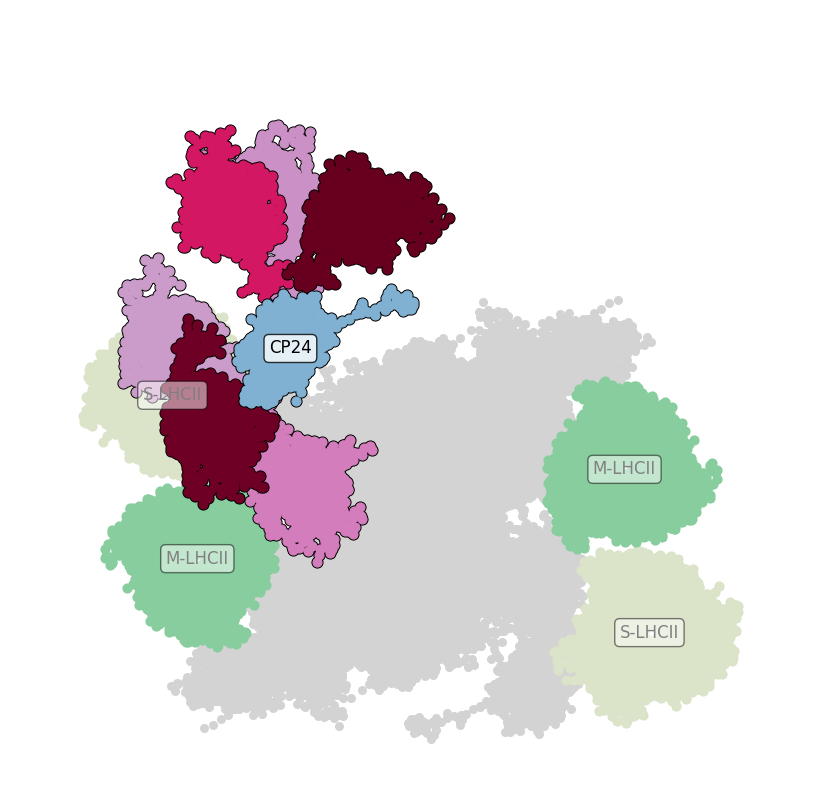

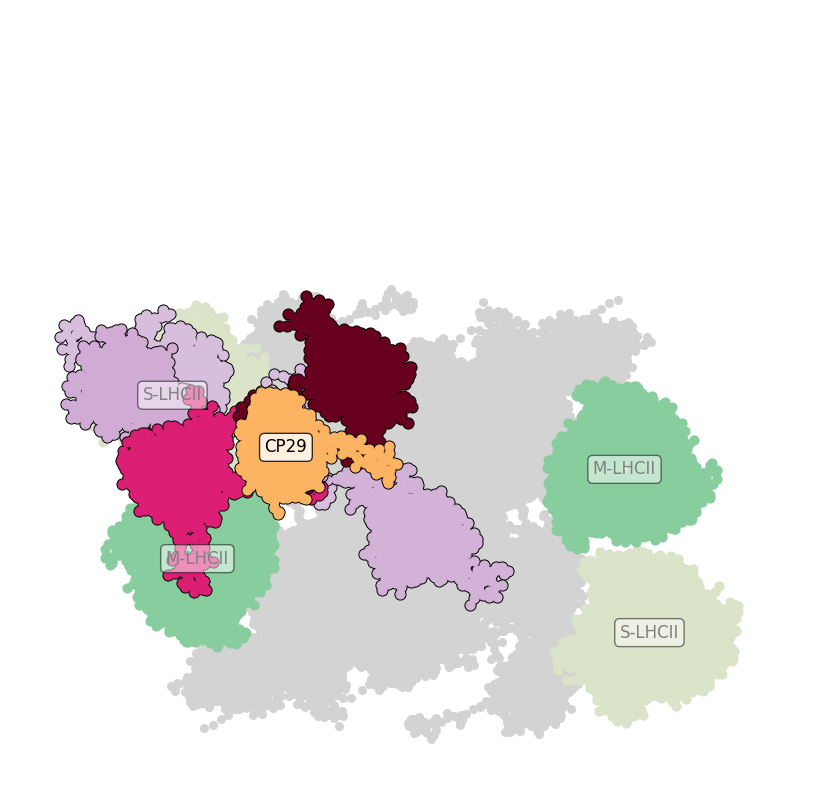

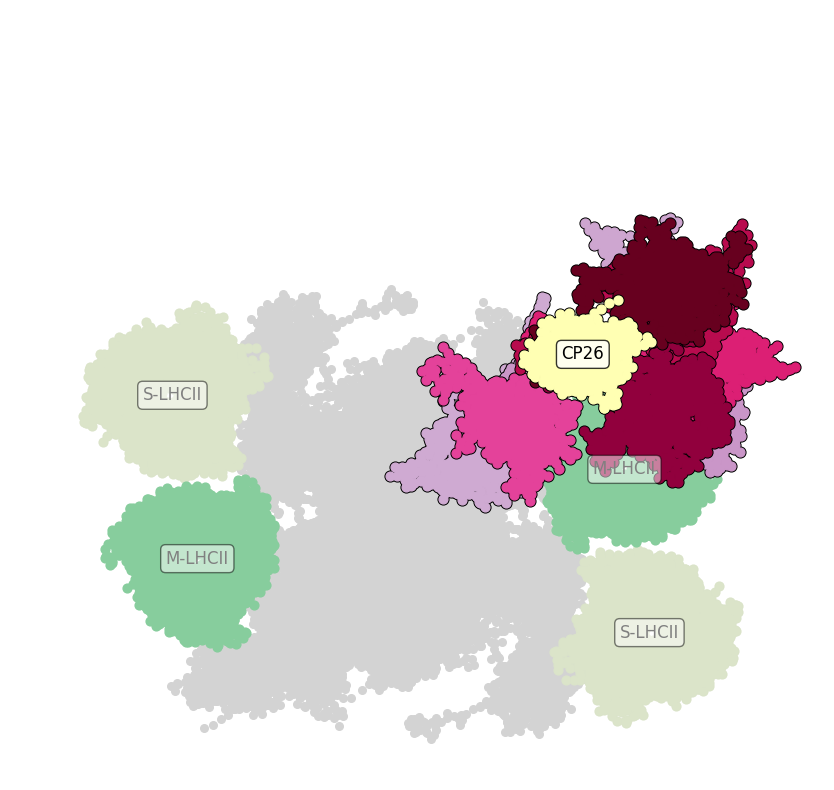

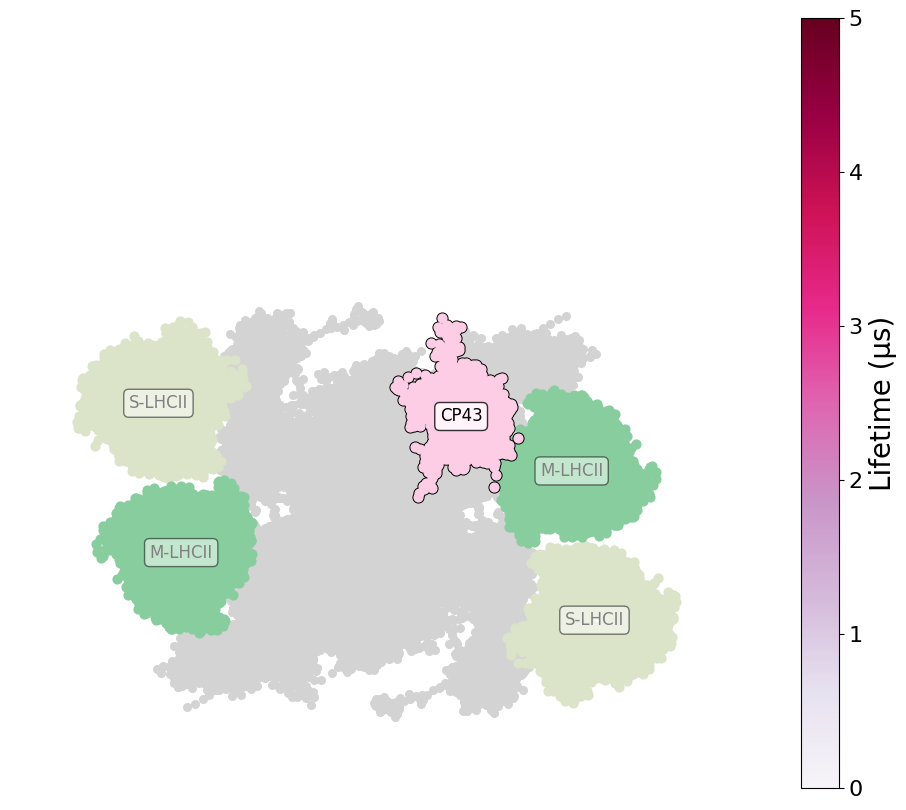

In [36]:
# Create separate figures for each chain
chains_plot = ["4", "r", "s", "c"]
chains_sel = ["8", "r", "s", "c"]
cmap= plt.get_cmap("Set3")

for idx, chain in enumerate(chains_plot):
    sel_chain = chains_sel[idx]
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Plot PSII background
    ax.scatter(pos0[:, 0], pos0[:, 1], color='lightgrey', alpha=1, s=30)

    # Plot LHCII complexes
    lhcii_sel = [["5", "6", "7"], ["1", "2", "3"], ["g", "y", "n"], ["G", "Y", "N"]]
    labels_lhcii = ["S-LHCII", "S-LHCII", "M-LHCII", "M-LHCII"]
    colors_lhcii = ["#DBE4C9", "#DBE4C9", "#87cd9d", "#87cd9d"]  

    for chain_idx in range(len(lhcii_sel)):
        chains = lhcii_sel[chain_idx]
        color = colors_lhcii[chain_idx]
        label = labels_lhcii[chain_idx]
        selection = u0.select_atoms(f"chainID {' '.join(chains)}")
        #ax.scatter(selection.positions[:, 0], selection.positions[:, 1], color="black", alpha=1, s=60)
        ax.scatter(selection.positions[:, 0], selection.positions[:, 1], color=color, alpha=1, s=40)
        # Get center of mass and plot label
        com = selection.center_of_mass()
        ax.text(com[0], com[1], label, color='grey', fontsize=12, ha='center', va='center',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.5))

    colors = [cmap(0), cmap(1), cmap(2), cmap(3), cmap(4), cmap(5), cmap(6), cmap(7)]
    colors_plot = [cmap(4), colors[5], colors[1], colors[7]]  
    labels_plot = ["CP24", "CP29", "CP26", "CP43"]
    lhcii_color = "#DBE4C9"

    # Plot the selections "not chainID {chain}" with cmap RdPu using lifetime_ns
    if chain in dict_binding_poses:
        cmap_rdpu = plt.get_cmap("PuRd")
        # Sort by lifetime_ns ascending so shortest bindings are plotted first, longest last
        sorted_poses = sorted(dict_binding_poses[chain], key=lambda x: x[1])
        # Compute max lifetime for normalization
        max_lifetime = max(lifetime_ns for _, lifetime_ns in sorted_poses) if sorted_poses else 1
        for universe, lifetime_ns in sorted_poses:
            selection = universe.select_atoms(f"not chainID {sel_chain}")
            norm_lifetime = lifetime_ns / max_lifetime
            color = cmap_rdpu(norm_lifetime)
            ax.scatter(selection.positions[:, 0], selection.positions[:, 1], color="black", alpha=1, s=60)
            ax.scatter(selection.positions[:, 0], selection.positions[:, 1], color=color, alpha=1, s=40)
            # Add file name as text at the center of mass
            com = selection.center_of_mass()
            # ax.text(com[0], com[1], f"{lifetime_ns:.1f} ns", color='black', fontsize=8, ha='center', va='center')

    # Plot the chain with selection "chainID {chain}" from u0
    color = colors_plot[idx]
    label = labels_plot[idx]
    selection = u0.select_atoms(f"chainID {sel_chain}")
    ax.scatter(selection.positions[:, 0], selection.positions[:, 1], color="black", alpha=1, s=60)
    ax.scatter(selection.positions[:, 0], selection.positions[:, 1], color=color, alpha=1, s=40)
    # Get center of mass and plot label
    com = selection.center_of_mass()
    ax.text(com[0], com[1], label, color='black', fontsize=12, ha='center', va='center', 
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    # Plot the selection "name MG"
    #mg_selection = u0.select_atoms(f"name MG and chainID {sel_chain}")
    #ax.scatter(mg_selection.positions[:, 0], mg_selection.positions[:, 1], color='darkgreen', alpha=1, s=30)
    
    # Set labels and title
    ax.set_xlabel('X Coordinate', fontsize=16)
    ax.set_ylabel('Y Coordinate', fontsize=16)
    #ax.set_title(f'Figure 1a: Binding Sites for Chain {chain}', fontsize=18)
    
    # Add heatmap colorbar for lifetime_ns only for the last plot
    if chain == chains_plot[-1]:
        # Create a ScalarMappable for the colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap_rdpu, norm=plt.Normalize(vmin=0, vmax=5))
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label('Lifetime (μs)', fontsize=20)
        cbar.ax.tick_params(labelsize=16)

    # Format axis ticks (convert to nanometers)
    x_ticks = ax.get_xticks()
    x_ticks_nm = [f"{x_tick / 10:.0f}" for x_tick in x_ticks]
    ax.set_xticklabels(x_ticks_nm, fontsize=20)
    y_ticks = ax.get_yticks()
    y_ticks_nm = [f"{y_tick / 10:.0f}" for y_tick in y_ticks]
    ax.set_yticklabels(y_ticks_nm, fontsize=20)
    
    # Set limits
    x_limits = [150, 520]
    y_limits = [0, 350]
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)
    
    # Modify aspect ratio
    ax.set_aspect('equal', adjustable='box')

    # Save figure
    output_dir = f"{dir5}/psii_psbs/figures"
    os.makedirs(output_dir, exist_ok=True)
    ax.axis('off')
    plt.savefig(f"{output_dir}/figure1a_chain_{chain}.png", dpi=600, bbox_inches='tight')
    plt.savefig(f"{output_dir}/figure1a_chain_{chain}.pdf", bbox_inches='tight')
    plt.show()

# PSII and its binding sites

In [37]:
# Read CSV files for each chain and load PDB universes
dict_binding_poses = {}
dir = "/martini/rubiz/Github/PsbS_Binding_Site/5_psii/binding_sites/all/clustering_grouped/clust_c045"
pdb_files = [f for f in os.listdir(dir) if f.endswith('.pdb')]
pdb_files = [os.path.join(dir, f) for f in pdb_files]

universes= []
for file in pdb_files:
    universes.append(mda.Universe(file))

keys = pdb_files
values = universes
chain_dict = {keys[i]: values[i] for i in range(len(keys))}




FileNotFoundError: [Errno 2] No such file or directory: '/martini/rubiz/Github/PsbS_Binding_Site/5_psii/binding_sites/all/clustering_grouped/clust_c045'

In [ ]:
for key, u in chain_dict.items():
    print(f"Processing {key}")

In [ ]:
csv="/martini/rubiz/Github/PsbS_Binding_Site/5_psii/binding_sites/all/occupancy.csv"
df = pd.read_csv(csv)
display(df)

In [ ]:
# Sort the chain_dict by the index in the dataframe in reverse order
sorted_chain_dict = {}
for index, row in df.iloc[::-1].iterrows():
    trajectory = row['trajectory']
    for key in chain_dict:
        basename = os.path.basename(key).replace('_aligned.pdb', '')
        if basename == trajectory:
            sorted_chain_dict[key] = chain_dict[key]
            break

print(sorted_chain_dict)

In [ ]:
# COLORS
cmap = plt.get_cmap("Set3")

fig, ax = plt.subplots(figsize=(12, 10))
selection = u0.select_atoms(f"all")
ax.scatter(selection.positions[:, 0], selection.positions[:, 1], c='lightgray', alpha=1, s=60)

cmap_rdpu = plt.get_cmap("PuRd")

universes = list(sorted_chain_dict.values())
keys = list(sorted_chain_dict.keys())
indexes = [0, 1, 2, 3, 4, 5, 6, 7, 8]
colors = [cmap(0), cmap(1), cmap(2), cmap(3), cmap(4), cmap(5), cmap(6), cmap(7)]

colors_plot = [cmap(4), colors[5], colors[1], colors[7], cmap(4), colors[5], colors[1], colors[7]]  
labels_plot = ["CP24", "CP29", "CP26", "CP43", "CP24", "CP26", "CP29", "CP43"]
chain_sel = ["8", "r", "s", "c", "4", "R", "S", "C"]

# Plot the reference chain_sel
for i in range(len(chain_sel)):
    chain = chain_sel[i]
    color = colors_plot[i]
    label = labels_plot[i]
    selection = u0.select_atoms(f"chainID {chain}")
    ax.scatter(selection.positions[:, 0], selection.positions[:, 1], color=color, alpha=1, s=60)
    cog = selection.center_of_geometry()
    ax.text(cog[0], cog[1], label, color='grey', fontsize=12, ha='center', va='center',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0))

# Plot LHCII complexes
lhcii_sel = [["5", "6", "7"], ["1", "2", "3"], ["g", "y", "n"], ["G", "Y", "N"]]
labels_lhcii = ["S-LHCII", "S-LHCII", "M-LHCII", "M-LHCII"]
colors_lhcii = ["#DBE4C9", "#DBE4C9", "#87cd9d", "#87cd9d"]  

for chain_idx in range(len(lhcii_sel)):
    chains = lhcii_sel[chain_idx]
    color = colors_lhcii[chain_idx]
    label = labels_lhcii[chain_idx]
    selection = u0.select_atoms(f"chainID {' '.join(chains)}")
    ax.scatter(selection.positions[:, 0], selection.positions[:, 1], c=color, alpha=1, s=60)
    cog = selection.center_of_geometry()
    ax.text(cog[0], cog[1], label, color='grey', fontsize=12, ha='center', va='center',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0))

# Load the correct occupancy DataFrame
occupancy_csv = "/martini/rubiz/Github/PsbS_Binding_Site/5_psii/binding_sites/all/occupancy.csv"
occupancy_df = pd.read_csv(occupancy_csv)

# Debug: Check occupancy DataFrame columns
print("Occupancy DataFrame columns:", occupancy_df.columns.tolist())
print("Occupancy DataFrame shape:", occupancy_df.shape)
print("First few rows:")
print(occupancy_df.head())

# Plot binding sites (S1-S9)
labels = ["S9", "S8", "S7", "S6", "S5", "S4", "S3", "S2", "S1"]
for i in indexes:
    basename = os.path.basename(keys[i])
    basename = basename.replace("_aligned.pdb", "") 
    label = labels[i]
    
    # Check if the required columns exist in occupancy_df
    trajectory_col = None
    occupancy_col = None
    
    # Look for trajectory column (might have different name)
    for col in occupancy_df.columns:
        if 'trajectory' in col.lower() or 'traj' in col.lower() or 'file' in col.lower():
            trajectory_col = col
            break
    
    # Look for occupancy column
    for col in occupancy_df.columns:
        if 'occupancy' in col.lower() or 'percent' in col.lower() or 'prob' in col.lower():
            occupancy_col = col
            break
    
    if trajectory_col is None:
        print(f"Warning: No trajectory column found. Using index {i} instead.")
        value = 50  # Default value
        norm_value = 0.5  # Default normalized value
    else:
        try:
            # Find matching row
            matching_rows = occupancy_df[occupancy_df[trajectory_col] == basename]
            if len(matching_rows) == 0:
                print(f"Warning: No matching trajectory found for {basename}")
                value = 50  # Default value
                norm_value = 0.5
            else:
                index_row = matching_rows.index[0]
                if occupancy_col:
                    value = occupancy_df.at[index_row, occupancy_col]
                    max_occupancy = occupancy_df[occupancy_col].max()
                    norm_value = value / max_occupancy if max_occupancy > 0 else 0.5
                else:
                    print(f"Warning: No occupancy column found")
                    value = 50
                    norm_value = 0.5
        except Exception as e:
            print(f"Error processing {basename}: {e}")
            value = 50
            norm_value = 0.5
    
    u = universes[i]
    color = cmap_rdpu(norm_value)
    sel = u.select_atoms(f"chainID A B and (not resname *MG* *HEME* *GG* *SQ* *PG* W* HOH *MG* *HG* PLQ PL9 LUT VIO XAT NEO NEX BCR CHL CLA CLB)")
    ax.scatter(sel.positions[:, 0], sel.positions[:, 1], c='black', alpha=1, s=90)
    ax.scatter(sel.positions[:, 0], sel.positions[:, 1], c=color, alpha=1, s=60)
    cog = sel.center_of_geometry()
    
    # Special positioning for S6
    if label == "S6":
        cog[1] -= 10
    
    ax.text(cog[0], cog[1], label, color='black', fontsize=12, ha='center', va='center',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=1))

# Add colorbar for occupancy
sm = plt.cm.ScalarMappable(cmap=cmap_rdpu, norm=plt.Normalize(vmin=0, vmax=35))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Probability (%)', fontsize=20)
cbar.ax.tick_params(labelsize=20)

# Set aspect ratio and turn off axis
ax.set_aspect('equal', adjustable='box')
ax.axis('off')

# Save the figure
output_dir = f"{dir5}/psii_psbs/figures"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f"{output_dir}/psii_binding_sites_overview.png", dpi=300, bbox_inches='tight')
plt.savefig(f"{output_dir}/psii_binding_sites_overview.pdf", bbox_inches='tight')

plt.show()
